# Telecomm Churn Data Analysis

## I. Tool Selection and Data Extraction - Python

Import necessary libraries, import data from Watson Analytics, and display successful data import.

In [1]:
import pandas as pd
import numpy as np

link = "https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv"

df = pd.read_csv(link)
df.head(5) #verify data extraction

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.tail(5) 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [3]:
#Save the raw data to excel file
writer = pd.ExcelWriter('./telecommAnalysis.xlsx')
df.to_excel(writer, sheet_name='RawData', index = False)

### A. Tool Benefits
Python is a multi-purpose language that has excellent tools baked in, as well as an easy to read and understand syntax. Python also has access to many data science specific libraries and tools, including calling functions from other statistical software such as R. Specifically for data extraction, the Python library Pandas is an excellent choice when pulling data from a file. The `pd.read_csv` function pulls the data with no hassle and the Pandas package has many helpful and easily used tools for data munging.

### B. Analysis Objectives
The dataset is telecomm customer information, including demographic, services and account information. The goal for analysis is to:

    1. Determine relationships and similarities in the variables of the dataset
    2. Determine which variables are strong predictors for customer churn
        a) Discover any hidden variables and determine effect on churn   

### C. Data Mining Methods
The data mining methods to be used in this analysis are split into two types:<br>
#### Descriptive
>***Hierarchical Clustering*** - creates clusters of similar variables, displayed as a dendrogram  

#### Predictive  
>***Random Forest Classification*** - constructs multiple randomly selected decision trees and returns the classification that occurs most often  
  
The descriptive method will be used to display similarities and gather inferences about the variables and their relationships. It is worth noting that Hierarchical Clustering can be used in dimension-reduction tasks by combining similar variables using linear combinations. However, Random Forests are robust to high dimensionality and thus dimension reduction in this case is not necessary. The predictive method will be used to  determine which variables are strong predictors for churn classification. The accuracy of this model will be determined using k-fold cross-validation as well as a train-test split of the data. Measures of model success are raw accuracy, precision, recall, and f1 score.

## II. Data Exploration and Preparation

### D. Target Variable  
The target variable is `Churn` - whether or not the customer discontinues business with the company. `Churn` is represented by two possible values, Yes or No, which indicates that this is a binary categorical variable.
### E. Independent Predictor Example  
There are 20 features, which means there are 20 independent variables or predictors. An example is `tenure`, an integer that represents the length of time in months that a customer has used any services.
### F. Data Preparation Goals  
Data preparation has two main goals:
    1. Clean inconsistencies and any erroneous data, identify outliers, and perform feature engineering
    2. Transform the data such that it is able to be passed to the algorithms chosen
The data must be cleaned in order to ensure that the model is trained on truthful data and is not misled. Machine learning, as with most things, has the adage "garbage in, garbage out". Finally, the data must be interpretable by the chosen algorithm. For example, most algorithms in python's SciKit-Learn library can only receive numeric data, requiring categorical data to be encoded.
### G. Statistical Identity
The data is an aggregation of demographic, services and account information for every customer of the telecommunications company. The data will be used to determine if there are any correlations in the variables and ultimately train a classification model for the successful prediction of whether a customer will churn. Training an accurate prediction model will allow the determination of which variables are the strongest and most important predictors.

### H. Data Cleaning
Data exploration and preparation is best started by getting a general feel for the dataset. This includes identifying what the variables are, their data types, and their distribution. While doing the initial exploration, note and take measures to clean and prepare the data for analysis.

In [4]:
#Inspect the variables and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Pandas keeps track of the individual samples with its own built-in index, therefore the `customerID` column is not needed. Also note that `TotalCharges` is displayed as an `object`, rather than an `int`. We will convert the column to numeric, coercing any empty strings to `NA`, then determine how many null values have been introduced.

In [5]:
df.drop('customerID', inplace = True, axis =1)
#convert to numeric, coerce errors to NA
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') 
df.TotalCharges.isnull().sum()

11

Only 11 values out of 7043 are null. If the values cannot be reliably imputed, we can safely drop the rows with little impact. Let's take a look and see if imputation by calculating the total charges by multiplying `tenure` and `MonthlyCharges` accurately reflects `TotalCharges`.

In [6]:
df['CalculatedCharges'] = df.tenure*df.MonthlyCharges
print('Calculated charges accurately reflects %d instances of TotalCharges out of 50' 
      % (df.TotalCharges == df.CalculatedCharges).head(50).sum())

Calculated charges accurately reflects 6 instances of TotalCharges out of 50


It appears that we cannot reliably impute `TotalCharges`. However, we *have* found a possible hidden variable to explore in our analysis: HiddenCharges. Let's remove the rows that we cannot impute for `TotalCharges` and drop `CalculatedCharges` as it is no longer needed. Instead of using total hidden charges for our new variable, average monthly hidden charges will be created instead. This is done to reduce dependency on `tenure`.

In [7]:
df.dropna(inplace = True)
#A positive value will represent extra charges to the customer,
#negative value will represent undercharging
df['HiddenMonthly'] = (df.TotalCharges - 
                       df.tenure*df.MonthlyCharges)/df.tenure
                                                                
#display distribution information about the numeric types in the dataset
df.drop('CalculatedCharges', inplace = True, axis = 1)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,HiddenMonthly
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.001215
std,0.368844,24.545260,30.085974,2266.771362,2.616165
min,0.000000,1.000000,18.250000,18.800000,-19.125000
25%,0.000000,9.000000,35.587500,401.450000,-1.147775
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.160179
max,1.000000,72.000000,118.750000,8684.800000,18.900000


Note from earlier that `SeniorCitizen` is displayed as an `int`. We see from the distribution information here that the data is simply representing the variable numerically in binary format. Because most of our data is already categorical and we will be using MCA which takes categorical data as input rather than numeric, let's go ahead and convert `SeniorCitizen` to a categorical variable, then display the statistics for the categorical variables.

In [8]:
df['SeniorCitizen'].replace({0:'No',1:'Yes'}, inplace = True)
df.describe(include=['object'])

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


We can now conclude that there are no longer any columns storing data in non-ideal data types. Let's inspect the distributions of the numeric variables for any outliers with boxplots, and the value types of the categorical variables:

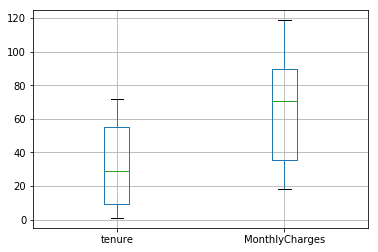

In [9]:
%matplotlib inline
df.boxplot(column=['tenure','MonthlyCharges']);

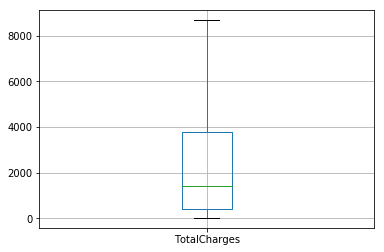

In [10]:
#TotalCharges is displayed separately due to dissimilar scaling to the others
df.boxplot(column='TotalCharges');

In [11]:
for x in df.columns:
    if df[x].dtypes.name == 'object':
        print("%s has %d factors: " % (x,df[x].unique().size),
              np.array2string(df[x].unique(), separator=',' ))

gender has 2 factors:  ['Female','Male']
SeniorCitizen has 2 factors:  ['No','Yes']
Partner has 2 factors:  ['Yes','No']
Dependents has 2 factors:  ['No','Yes']
PhoneService has 2 factors:  ['No','Yes']
MultipleLines has 3 factors:  ['No phone service','No','Yes']
InternetService has 3 factors:  ['DSL','Fiber optic','No']
OnlineSecurity has 3 factors:  ['No','Yes','No internet service']
OnlineBackup has 3 factors:  ['Yes','No','No internet service']
DeviceProtection has 3 factors:  ['No','Yes','No internet service']
TechSupport has 3 factors:  ['No','Yes','No internet service']
StreamingTV has 3 factors:  ['No','Yes','No internet service']
StreamingMovies has 3 factors:  ['No','Yes','No internet service']
Contract has 3 factors:  ['Month-to-month','One year','Two year']
PaperlessBilling has 2 factors:  ['Yes','No']
PaymentMethod has 4 factors:  ['Electronic check','Mailed check','Bank transfer (automatic)',
 'Credit card (automatic)']
Churn has 2 factors:  ['No','Yes']


Looking at the boxplots, there are no outliers that need to be inspected or removed. On inspection of the categorical variables we see that we can remove the "No X service" option, as there is a variable dedicated to that information already. Removing unnecessary factor levels will improve our algorithm processing time and lower resource demands. Additionally, there are several opportunities to shorten category names which will also alleviate processing demands. <br>  
While we tidy up the categories, we will also discretize the continuous variables to allow the data to be passed to our chosen algorithms.

In [12]:
hiddenseries = []
for x in df['HiddenMonthly'].values:
    if x > 0:
        hiddenseries.append('Over')
    elif x < 0:
        hiddenseries.append('Under')
    else:
        hiddenseries.append('No')
df['HiddenChargesCat'] = np.asarray(hiddenseries) #categorize discrepancies in 
                                        #total/calculated charges for frequency analysis
changeCols=['MultipleLines','OnlineSecurity','OnlineBackup',
            'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
#Removing redundant information - 'No x service' already reported by 'no' in internet and 
#phone columns
for x in changeCols:
    df[x] = df[x].str.replace('No .* service', 'No', case=False)

df.PaymentMethod.replace({'Electronic check':'eCheck','Mailed check':'MailCheck',
                          'Bank transfer (automatic)':'ACH',
                          'Credit card (automatic)':'autoCredit'}, inplace=True)
df.Contract.replace({'Month-to-month':'MtM','One year':'1Y','Two year':'2Y'}, inplace=True)
df.InternetService.replace({'Fiber optic':'Fiber'}, inplace=True)

colReord =['Churn','gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','tenure', 'MonthlyCharges', 'TotalCharges','HiddenChargesCat','HiddenMonthly']
df=df[colReord]

#Copy cleaned dataframe for later access
dfWithExt = df.copy()
df.drop('HiddenChargesCat',axis=1,inplace=True)
df.to_excel(writer, sheet_name='CleanData', index = False)
writer.save()

The final step before the data can be analyzed is splitting the data into a target dataframe and predictor series.

In [13]:
#Create the arrays to be passed to sklearn
X = df.drop('Churn',axis=1).values
y = df['Churn'].values

## III. Data Analysis
### I. Univariate Distribution
Univariate distribution analysis was applied earlier in the data cleaning process using boxplots for the numeric variables. In addition to those plots, let's take a look at the frequency distributions for the discretized variables as well as a few other variables of interest.

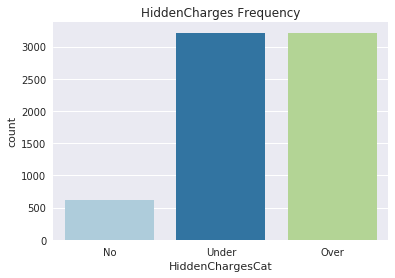

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
sns.set_palette('Paired')
hiddenCount = sns.countplot(x='HiddenChargesCat',data=dfWithExt).set_title('HiddenCharges Frequency')

Surprisingly, it appears that a majority of people are charged a different value than what `tenure` multiplied by `MonthlyCharges` would suggest. It also appears uniformly random as to whether they are over or under-charged.

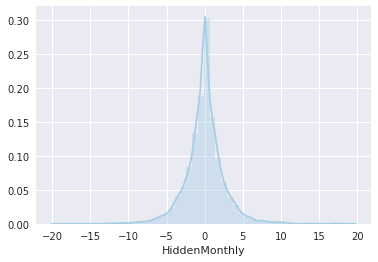

In [15]:
hiddenDist = sns.distplot(df.HiddenMonthly)

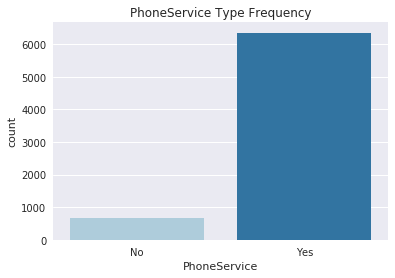

In [16]:
phoneCount=sns.countplot(x='PhoneService', 
                         data=dfWithExt).set_title('PhoneService Type Frequency')

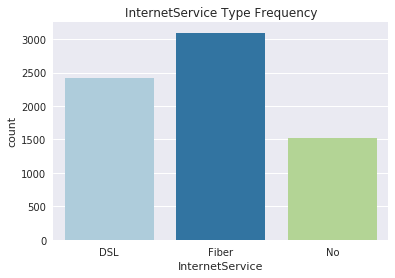

In [17]:
internetCount = sns.countplot(x='InternetService',
                              data=dfWithExt).set_title(
                                'InternetService Type Frequency')

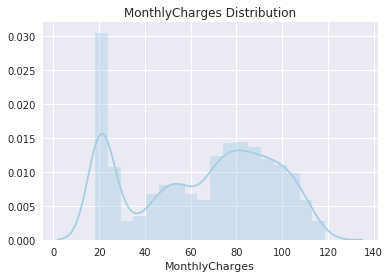

In [18]:
monthlyDist = sns.distplot(df.MonthlyCharges).set_title(
    'MonthlyCharges Distribution')

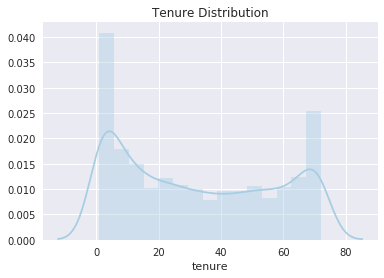

In [19]:
tenureCount = sns.distplot(df.tenure).set_title(
    'Tenure Distribution')

The distribution of `tenure` is bimodal, indicating that there are two distinct groups of customer: short tenure (about 1-2 years) and long tenure (about 5-6 years).

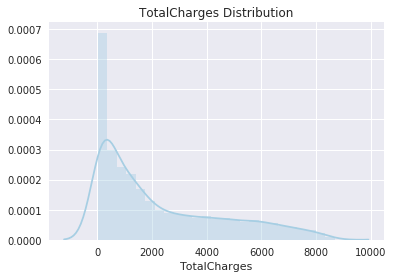

In [20]:
totalDist = sns.distplot(df.TotalCharges).set_title(
    'TotalCharges Distribution')

The total charges is pretty heavily right-skewed, which correlates with having a slightly larger proportion of people with shorter tenures. If the data were to be put into a parametric algorithm, it would need to be log-transformed.

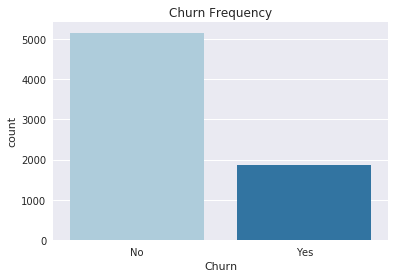

In [21]:
churnCount = sns.countplot(x='Churn', 
                           data=dfWithExt).set_title(
                                                'Churn Frequency')

In [22]:
#Churn proportions
df.Churn.value_counts(normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

Roughly one in four customers will choose to leave the company.

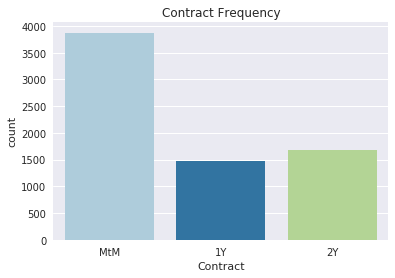

In [23]:
contractCount = sns.countplot(x='Contract', data=dfWithExt).set_title('Contract Frequency')

### J. Bivariate Distribution
A couple of variables in the previous univariate look interesting for comparing against other variables. Let investigate the bivariate distributions of some of the features:

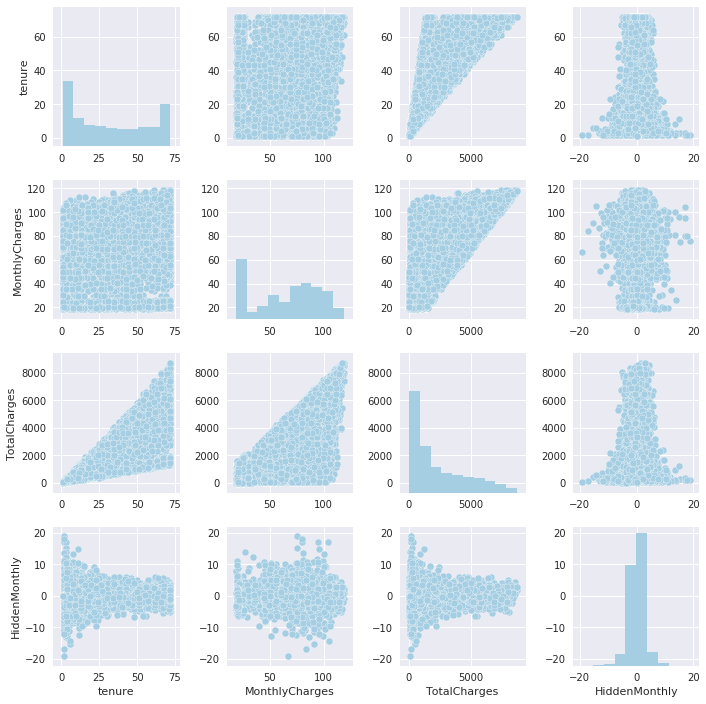

In [24]:
pair = sns.pairplot(df)

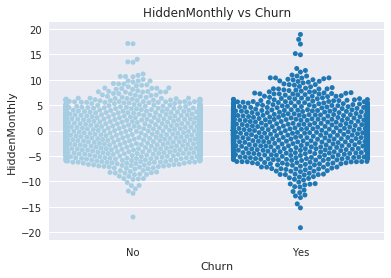

In [25]:
hiddenChurnCount = sns.swarmplot(x='Churn', 
                            y='HiddenMonthly', 
                            data=dfWithExt).set_title('HiddenMonthly vs Churn')

While no decisions can be made from this graph, it does appear that the bulge is slightly larger on the swarmplot for `Churn` equal 'yes'. It will be worth checking on this variable during the prediction feature inspection.

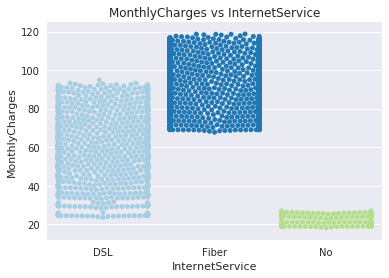

In [26]:
monthlyInternetCount = sns.swarmplot(x='InternetService',
                                     y='MonthlyCharges',
                                     data=dfWithExt).set_title(
                                        'MonthlyCharges vs InternetService')

Unsurprisingly, the customers with the highest charges are those that have fiber internet, whilst the customers with the lowest charges primarily have no internet service. 

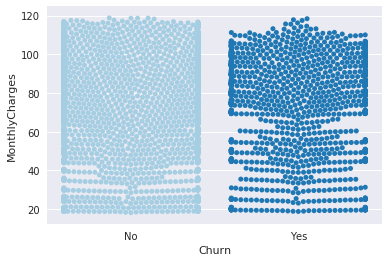

In [27]:
monthlyCI = sns.swarmplot(x='Churn',
                           y='MonthlyCharges', 
                           data=dfWithExt)

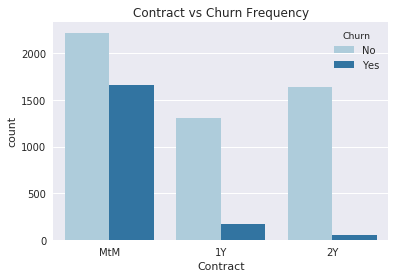

In [28]:
contractChurn=sns.countplot(x='Contract', 
                            hue='Churn',
                            data=dfWithExt).set_title('Contract vs Churn Frequency')

Those on a Month-to-Month contract churn more often than those on a one or two-year agreement. Let's plot this against `tenure` to see if there is any additional correlation:

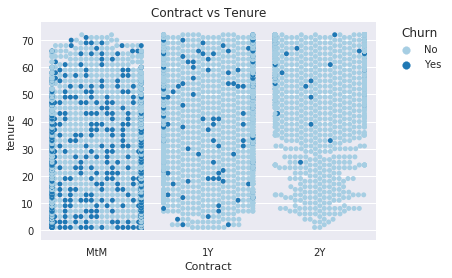

In [29]:
contractTC= sns.swarmplot(x='Contract',
                           y='tenure',hue='Churn',
                           data=dfWithExt).set_title('Contract vs Tenure');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Churn');

The above graphs show that Month-to-Month customers that have been with the company for under a year have a higher probability to churn. Another point of interest is that longer standing customers who were likely previously on one or two-year agreements and have dropped to Month-to-Month are at a much higher risk of churn after choosing not to renew the contract agreement.

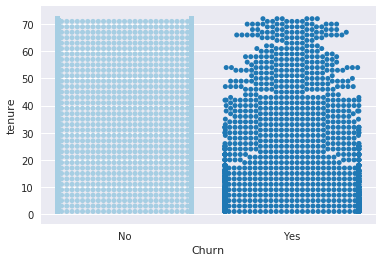

In [30]:
tenureChurn = sns.swarmplot(x='Churn',
                            y='tenure',
                            data=dfWithExt)

### K. Machine Learning
#### Descriptive Method

For the descriptive method, python will be used to call a hierarchical clustering algorithm from the statistical language R. The algorithm will find variables that are similar in nature and group them together.

In [31]:
#Switch to R for descriptive analysis
%load_ext rpy2.ipython
import warnings
warnings.filterwarnings('ignore')
%R require('ggplot2')
%Rpush df

In [32]:
%%R
colnames(df)

 [1] "Churn"            "gender"           "SeniorCitizen"    "Partner"         
 [5] "Dependents"       "PhoneService"     "MultipleLines"    "InternetService" 
 [9] "OnlineSecurity"   "OnlineBackup"     "DeviceProtection" "TechSupport"     
[13] "StreamingTV"      "StreamingMovies"  "Contract"         "PaperlessBilling"
[17] "PaymentMethod"    "tenure"           "MonthlyCharges"   "TotalCharges"    
[21] "HiddenMonthly"   


In [33]:
%%R
require('ClustOfVar')
#rdf = read.csv('~/WGU/C744/Python/dataForR.csv')
#Create the hierarchical clustering of the data
dendro = hclustvar(X.quali = df[,2:17], X.quanti = df[,18:21])

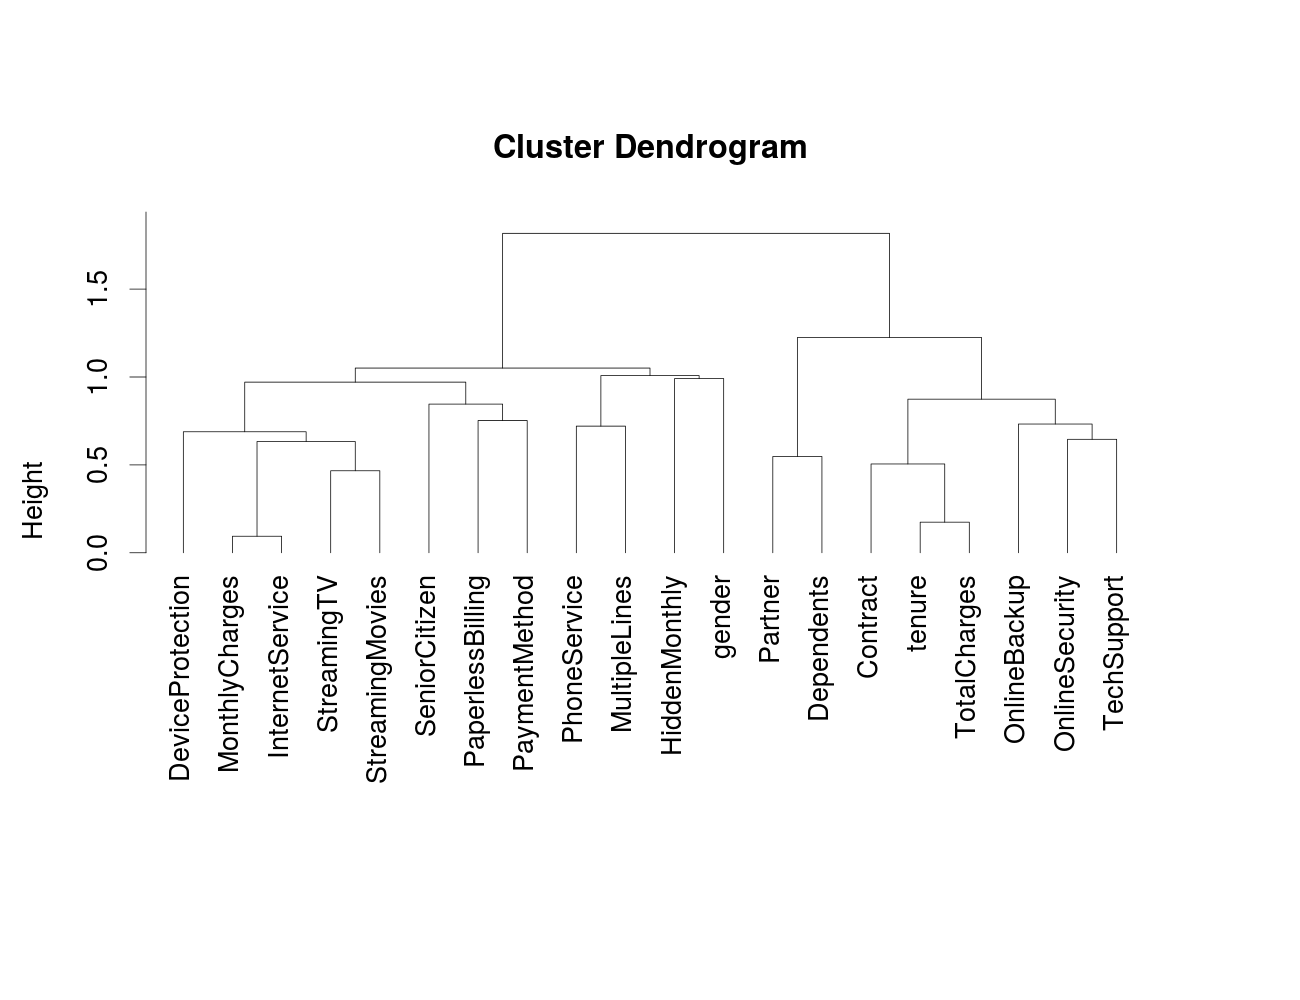

In [34]:
%%R -h 1000 -w 1300
par(pin=c(14,8),cex=2.25)
plot(dendro, type="tree")

This is a great visual representation of clusters and the similar variables within them, but it can be difficult to understand how many clusters should be used when understanding similarities due to clusters within clusters being present. In order to choose the proper number of clusters to look at and see the variables within them, the data is bootstrapped and clustered 100 times to determine the most stable clusters:


Call:
stability(tree = dendro, B = 100, graph = TRUE)


 name     description                            
 "$matCR" "matrix of corrected Rand indices"     
 "$meanR" "vector of mean corrected Rand indices"


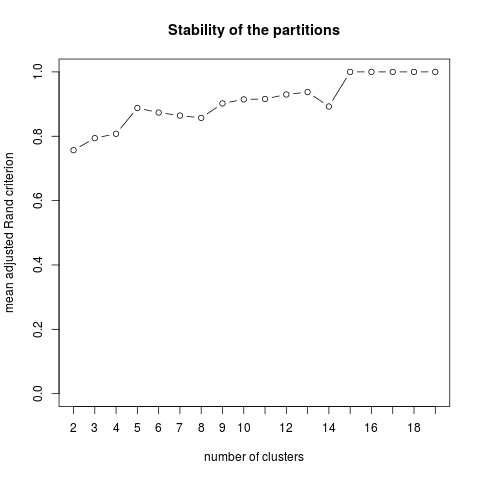

In [35]:
%%R
#bootstrap 100 h.clusters (will take a while to run 100 random sampled clusterings), 
#graph stability result for each of n clusters
stability(dendro,B=100,graph=TRUE) 

According to this stability graph, five clusters is an optimal balance between increased stability and keeping number of clusters (i.e. features) low. In the next cell we will cut the dendrogram into five clusters of similar variables and inspect their loadings.

In [36]:
%%R
cut = cutreevar(dendro,5,matsim=TRUE)
summary(cut)


Call:
cutreevar(obj = dendro, k = 5, matsim = TRUE)



Data: 
   number of observations:  7032
   number of  variables:  20
        number of numerical variables:  4
        number of categorical variables:  16
   number of clusters:  5

Cluster  1 : 
               squared loading correlation
TotalCharges              0.79        0.89
tenure                    0.76        0.87
Contract                  0.47          NA
TechSupport               0.37          NA
OnlineBackup              0.35          NA
OnlineSecurity            0.34          NA


Cluster  2 : 
                 squared loading correlation
MonthlyCharges             0.876        0.94
InternetService            0.710          NA
StreamingMovies            0.521          NA
StreamingTV                0.521          NA
DeviceProtection           0.327          NA
PaymentMethod              0.279          NA
PaperlessBilling           0.220          NA
SeniorCitizen              0.094          NA


Cluster  3 : 
         

The first cluster is dominated by `TotalCharges` and `tenure`. The synthetic variable this cluster describes can be thought of as describing "length and cost of service". The second cluster correlates `MonthlyCharges` and `InternetService`, thus the synthetic variable accounts for the relationship between type of internet and the monthly bill. Similar statements can be made for each of the remaining clusters - simply find the features with the highest loading, and those features are the dominant aspect of the new synthetic variable.  

The similarity matrix quantifying pair-wise similarity between variables is shown in the cell below.

In [37]:
%%R
print(cut$sim)

$cluster1
                  tenure TotalCharges OnlineSecurity OnlineBackup TechSupport
tenure         1.0000000    0.6820785     0.10777924   0.13042100  0.10581258
TotalCharges   0.6820785    1.0000000     0.17025425   0.26020231  0.18737502
OnlineSecurity 0.1077792    0.1702542     1.00000000   0.08025013  0.12564045
OnlineBackup   0.1304210    0.2602023     0.08025013   1.00000000  0.08626245
TechSupport    0.1058126    0.1873750     0.12564045   0.08626245  1.00000000
Contract       0.4633725    0.2100904     0.06330903   0.02716158  0.08805347
                 Contract
tenure         0.46337253
TotalCharges   0.21009042
OnlineSecurity 0.06330903
OnlineBackup   0.02716158
TechSupport    0.08805347
Contract       1.00000000

$cluster2
                 MonthlyCharges SeniorCitizen InternetService DeviceProtection
MonthlyCharges       1.00000000   0.048344677      0.82050133      0.232909432
SeniorCitizen        0.04834468   1.000000000      0.07018259      0.003541901
InternetServic

An example for interpreting the above output can be found in Cluster 1 with `tenure` and `TotalCharges`, whose similarity coefficient is 0.68. We would expect these two variables to ultimately share similar information since the longer someone is paying for a service, the higher the total amount they will have paid is.  
An additional example is found in Cluster 2 with `MonthlyCharges` and `InternetService`, whose similarity coefficient is 0.82. This solidifies the observation made in the bivariate statistics section that those with fiber internet experience the highest monthly prices.

#### Predictive Method

In [38]:
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

#Encode data to numeric for interpretation by scikit learn
y = df['Churn'].replace({'Yes':1,'No':0}).values
X = pd.get_dummies(df.drop('Churn',axis=1), drop_first=True)
 
#Create train/test split for validation
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=.33)

In [39]:
#hyperparameters to search over
p_grid = {"n_estimators":[50,100,250,500],
          "max_depth":[15,25,None],
          "min_samples_split": [10,15,20],
          "min_samples_leaf": [5,10],
          "max_features":["sqrt","log2",None]}

#Set rand_state for reproducibility
rfc=RandomForestClassifier(random_state=44)
clf = GridSearchCV(rfc,
                   param_grid=p_grid, scoring='f1', cv=10,
                   n_jobs=-1)
clf.fit(X_train,y_train)

bestp = clf.best_params_
#Display the best parameters
bestp

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 250}

In [40]:
ytrue, ypred = y_test, clf.predict(X_test)
print(classification_report(ytrue,ypred))

             precision    recall  f1-score   support

          0       0.83      0.93      0.88      1712
          1       0.70      0.48      0.57       609

avg / total       0.80      0.81      0.80      2321



In [41]:
#Display raw accuracy for comparison between gridsearch and 
#directly trained classifier
print(accuracy_score(ytrue,ypred))

0.809995691512


In [42]:
#Verify that independently trained model with the given
#parameters produces the same results
rfc=RandomForestClassifier(n_estimators=50,max_depth=15, 
                           max_features='sqrt', min_samples_leaf=5,
                           min_samples_split=15,random_state=44,
                           n_jobs=-1)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.80956484274019824

In [43]:
#Display feature importances
features=pd.Series(data=rfc.feature_importances_,index=X.columns)
features.sort_values(ascending=False,inplace=True)
print(features)

tenure                      0.180613
Contract_MtM                0.125138
TotalCharges                0.124726
MonthlyCharges              0.117784
InternetService_Fiber       0.087012
HiddenMonthly               0.070539
Contract_2Y                 0.038742
PaymentMethod_eCheck        0.035168
InternetService_No          0.034866
TechSupport_Yes             0.021898
OnlineSecurity_Yes          0.020300
PaperlessBilling_Yes        0.017960
StreamingMovies_Yes         0.015007
DeviceProtection_Yes        0.012876
SeniorCitizen_Yes           0.012174
gender_Male                 0.012029
Partner_Yes                 0.011943
MultipleLines_Yes           0.011897
StreamingTV_Yes             0.010826
OnlineBackup_Yes            0.010634
PaymentMethod_MailCheck     0.008362
Dependents_Yes              0.008271
PaymentMethod_autoCredit    0.005998
PhoneService_Yes            0.005236
dtype: float64


Looking at the features with importances above .05, the most important predictors are:  
    1. `tenure` 
    2. `TotalCharges` 
    3. `MonthlyCharges`
    4. `Contract_MtM`  
    5. `HiddenMonthly`  
    6. `InternetService_Fiber`  
This verifies the hunches based on the univariate and bivariate statistics sections above, in addition to clustering, that the `tenure` in combination with `Contract` being month-to-month is an indicator of possible churn is correct. Additionally, the amounts charged combined with an `InternetService` of type `fiber` is also an indicator of churn. Finally, `HiddenCharges` is also proved to play a part in a customer's decision to discontinue services.

### L. Algorithm Justification
#### Hierarchical Clustering
Hierarchical Clustering is a great method for visually displaying how each of the features fit into similar groups. While other algorithms such as MCA or PCA can show how features within a component (i.e. cluster) relate to eachother, there are many pitfalls they suffer from that hierarchical clustering does not:
-  Unable to natively support heterogeneous data
-  Unable to visually show the relationship of features within multiple components (clusters) due to limitations in greater than three dimensional graphing  

#### Random Forest Classification
Random Forest Classification is a very robust method that easily overcomes heterogeneous data, variable interactions, and multicollinearity. Bootstrapping allows the tree to better choose splits that end up increasing individual bias without affecting the overall bias-variance tradeoff of the model due to the averaging that is done over the results of all trees.  

Further, random forests are able to show the importance of each individual feature. This allows us to easily inspect which features are important to the overall `Churn` classification whereas other algorithms are not nearly as transparent.

### M. Presentation Method Justification
Graphs outputted from python directly use the Seaborn package - one of the easiest to use and most visually appealing graphics packages available in python.  

Graphs outputted from R running from within python use the default plotting function which natively has convenient and accessible syntax.  

In the case of either language, using graphing capabilities in the language itself is far more convenient than using out-side software for graphing tasks. Performing graphing with the language directly removes any need for version control of the data (i.e. keeping the data consistent and current between any updates during development).

## IV. Data Summary
### N. Prediction Accuracy
Prediction accuracy is shown in Section K in several forms: raw accuracy, precision, recall, and f1 score. The definition for each can be found below:
>**Raw accuracy** - whether the prediction correctly matches the true value

>**Precision** - the ratio of true positives over true positives and false positives
>>$\frac{true positive}{true positive + false positive}$  


>**Recall** - the ratio of true positives over true positives and false negatives, also known as sensitivity
>>$\frac{true positive}{true positive + false negative}$  

>**F1 Score** - harmonic mean of precision and recall
>>  $2*\frac{precision*recall}{precision + recall}$  

The prediction method shows descrimination by having accuracy, precision, recall, and f1 score greater than or equal to 80%. Additionally, the feature importances were able to display which features were the strongest predictors for churn, as set out in the proposed goals of the analysis.

### O. Interactions and Predictions
No steps were taken to directly identify interactions between variables, as Random Forests are extremely robust to variable interactions. Indeed, the initial purpose of decision tree algorithms was to identify variable interactions$^1$. Typically, variable interactions and multicollinearity are only a cause for concern when doing linear regressions and determining variable coefficients, not when using non-parametric algorithms such as Random Forests.  

The most important predictors were hinted at during the descriptive analysis section by using the variable loadings in the hierarchical clusters. The hinted predictors were confirmed and concretely determined once the random forest classifier was trained and feature importances, used in the predictions, displayed.

### P. Sources
No texts are directly quoted or paraphrased. However, the following links are provided for additional or background reading on various topics discussed:
1. http://stat.columbia.edu/~jakulin/Int/jakulin05phd.pdf (Classification trees and interactions)  

2. https://arxiv.org/pdf/1112.0295.pdf (ClustofVar package)